<a href="https://colab.research.google.com/github/saadiahmadx/IW23/blob/main/IW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brainstorm



Constitution Ideas:
* target-only (has mention; control)
* hateful keyword
*  -->

google trends: "black lives matter":
* May 3 - Dec 26, 2020 (1% to 1%)
* May 17 - Aug 22 (spike onset to decay; has longer tail)

google trends: "looting":
* May 17 - June 20 (spike onset to decay; no tail)

google trends: "blue lives matter":
* May 17 - July 11 (spike onset to decay; long tail)

Annotation Strategy:
1. Select tweets by oversampling tweets with BLM or "hate" keywords
2. 2 annnotators read texts, sample 50 tweets, go over and discuss with me, revisit 50 tweets for changes, go over, done
3. annotators annotate 3k tweets
4. Note inter-rater score and Cohen's Kappa score
5. Select data classified the same by BOTH annotators


# Add and clean dataset

**Dataset info:**
* 9165 tweets
* data collection period: 05/27 to 7/26 (2 months)
* excluded users <150 followers (reduce bot spam tweets)
* hate-speech specific tweets targeted via hashtags: BLM, ChangeTheSystem, AtlantaProtest, JusticeForGeorgeFloyd, BlueLivesMatter

**Annotation criteria**
* mention of hateful text
* mention of non-hateful text
* 5 undergrad/grad annotators, 100% agreement of at least 2/3 annotators selects tweet for final annotation, if agreement of last 2 annotators then final labeled, otherwise remove tweet from consideration



In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 11.9 MB/s eta 0:00:00


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import pandas as pd
import ast
from IPython.display import display
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
url = 'https://raw.githubusercontent.com/saadiahmadx/IW23/main/TweetBLM.csv'
df = pd.read_csv(url)
updated_df = df

info. gathering + basic dataset cleaning 

In [ ]:
print ('n =', df['hate label'].count(), '\n')
print(df['hate label'].value_counts(normalize=True), '(normalized) \n')
print(df['source'].value_counts(normalize=True), '(normalized) \n')

#convert user_created dates to numeric
updated_df['user_created'] = pd.to_datetime(df['user_created'], errors='coerce', dayfirst=True)

#collection period, 1mo before, 6mo, 1yr, 5yr
custom_bins = ['2020-08-10 11:00:00', '2020-05-26 00:00:00', '2020-04-26 00:00:00', '2019-11-26 00:00:00', '2019-05-26 00:00:00', '2015-05-26 00:00:00']
custom_bins = pd.to_datetime(custom_bins.reverse())
print(updated_df['user_created'].value_counts(normalize=True, bins=12), '(normalized) \n')

print(updated_df['hashtags'].value_counts(normalize=True), '(normalized) \n')
# def convert_hashtag_string(s):
#   t = ast.literal_eval(s)
#   t = [n.strip() for n in t]
#   return t
# all_hashtags = []
# for index, row in df['hashtags'].iteritems():
#   print(row)
#   if (row):
#     h = convert_hashtag_string(str(row).replace('\'', '"'))
#     all_hashtags = all_hashtags + h
# df_hashtag = pd.Series(all_hashtags)
# print(df_hashtag.value_counts(normalize=True))

n = 9165 

0    0.663502
1    0.336498
Name: hate label, dtype: float64 (normalized) 

Twitter for iPhone     0.338791
Twitter for Android    0.311722
Twitter Web App        0.274722
Twitter for iPad       0.046169
TweetDeck              0.004802
                         ...   
SYSTHUB                0.000109
WordPress.com          0.000109
Biden Cabinet App      0.000109
Echofon                0.000109
dlvr.it                0.000109
Name: source, Length: 79, dtype: float64 (normalized) 

(2019-06-17 15:05:00, 2020-08-10 11:00:00]              0.231424
(2009-02-11 03:50:00, 2010-04-06 23:45:00]              0.115330
(2018-04-23 19:10:00, 2019-06-17 15:05:00]              0.092526
(2011-05-31 19:40:00, 2012-07-24 15:35:00]              0.089689
(2016-01-05 03:20:00, 2017-02-27 23:15:00]              0.083797
(2017-02-27 23:15:00, 2018-04-23 19:10:00]              0.081397
(2013-09-17 11:30:00, 2014-11-11 07:25:00]              0.075505
(2012-07-24 15:35:00, 2013-09-17 11:30:00]        

tweet preprocessing

In [ ]:
import re, string, unicodedata
import contractions
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.util import ngrams

text='RT @AgainWoodsy: 🍏🍏 Don\'t like mentally retarded & weird @JoeBiden #BlackLivesMatter activists screaming like big girls in a shopping store. https://t.co/KlhxJoSoLu'

def get_media_url(tweet):
  media_link = 'https://t.co/' + re.findall("https://t.co/([a-zA-Z0-9_]{1,50})", tweet)[0]
  return media_link

def get_retweet(tweet):
  return re.findall("RT @([a-zA-Z0-9_]{1,50})", tweet)

def get_mentions(tweet):
  return re.findall("@([a-zA-Z0-9_]{1,50})", tweet)

def get_hashtags(tweet):
  return re.findall("#([a-zA-Z0-9_]{1,50})", tweet)

def remove_url(text):
  return re.sub(r"https?:[^\s]+", "", text)

def remove_contractions(text):
  return contractions.fix(text)

def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

def process_tweet(tweet):
  p_tweet = tweet
  p_tweet = remove_url(p_tweet)
  p_tweet = remove_contractions(p_tweet)
  retweet = get_retweet(p_tweet)
  if (retweet):
    p_tweet = p_tweet.replace('RT @' + retweet[0] + ': ', '')
  p_tweet = p_tweet.lower()
  mentions = get_mentions(p_tweet)
  if (mentions):
    for i in range(len(mentions)):
      p_tweet = p_tweet.replace(' @' + mentions[i], '')
  hashtags = get_hashtags(p_tweet)
  if (hashtags):
    for i in range(len(hashtags)):
      p_tweet = p_tweet.replace(' #' + hashtags[i], '')
  
  words = nltk.word_tokenize(p_tweet)
  #print('\nwords:', words)

  words = normalize(words)
  return words

def process_tweet_light(tweet):
  p_tweet = tweet
  p_tweet = remove_url(p_tweet)
  retweet = get_retweet(p_tweet)
  if (retweet):
    p_tweet = p_tweet.replace('RT @' + retweet[0] + ': ', '')
  p_tweet = p_tweet.lower()
  mentions = get_mentions(p_tweet)
  if (mentions):
    for i in range(len(mentions)):
      p_tweet = p_tweet.replace(' @' + mentions[i], '')
  hashtags = get_hashtags(p_tweet)
  if (hashtags):
    for i in range(len(hashtags)):
      p_tweet = p_tweet.replace(' #' + hashtags[i], '')

  # words = nltk.word_tokenize(p_tweet)
  # words = remove_non_ascii(words)
  return p_tweet

print(' Original Tweet:\n', text, '\n\n', 'Processed Tweet:\n', process_tweet(text), '\n', 'Processed Tweet (light):\n', process_tweet_light(text))
print('\nMedia Link:', get_media_url(text), '\nRetweet:', get_retweet(text), '\nMentions:', get_mentions(text), '\nHashtags:', get_hashtags(text))

 Original Tweet:
 RT @AgainWoodsy: 🍏🍏 Don't like mentally retarded & weird @JoeBiden #BlackLivesMatter activists screaming like big girls in a shopping store. https://t.co/KlhxJoSoLu 

 Processed Tweet:
 ['like', 'mentally', 'retarded', 'weird', 'activists', 'screaming', 'like', 'big', 'girls', 'shopping', 'store'] 
 Processed Tweet (light):
 🍏🍏 don't like mentally retarded & weird activists screaming like big girls in a shopping store. 

Media Link: https://t.co/KlhxJoSoLu 
Retweet: ['AgainWoodsy'] 
Mentions: ['AgainWoodsy', 'JoeBiden'] 
Hashtags: ['BlackLivesMatter']


In [ ]:
all_mentions = []
all_hashtags = []
all_unigrams = []
all_bigrams = []
updated_df.drop(['hashtags', 'source', 'user_created', 'user_friends', 'user_favourites', 'is_retweet'], axis=1, inplace=True)
updated_df_light = updated_df
for index, row in df['text'].iteritems():
  all_mentions += get_mentions(row.lower())
  all_hashtags += get_hashtags(row.lower())
  processed = process_tweet(row)
  all_unigrams += processed
  all_bigrams += list(ngrams(processed, 2))
  updated_df.at[index, 'text'] = processed
  updated_df_light.at[index, 'text'] = process_tweet_light(row)


In [ ]:
display(updated_df)

,text,hate label
0,now should know that and that if they don't ta...,0
1,tonight we interview and you can tune in from ...,0
2,"some officers advance close to the crowd, atte...",0
3,he’s not in the wwe hof because of his skin co...,0
4,@shaunking ...going through it now fighting fo...,0
...,...,...
9160,watch “segregated by design” by on -- watch t...,1
9161,"#dawnbutler to be fair, she’s always known tha...",1
9162,#hislifemattered have any of you heard offer c...,1
9163,like this whole niranga situation makes me ret...,1


In [ ]:
from google.colab import drive
drive.mount('drive')

df.to_csv('/content/drive/My Drive/IW_COLAB/df.csv', encoding='utf-8', index=False)
updated_df.to_csv('/content/drive/My Drive/IW_COLAB/updated_df.csv', encoding='utf-8', index=False)
updated_df_light.to_csv('/content/drive/My Drive/IW_COLAB/updated_df_light.csv', encoding='utf-8', index=False)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Stats

In [ ]:
df_hashtag = pd.Series(all_hashtags)
df_mentions = pd.Series(all_mentions)
df_unigrams = pd.Series(all_unigrams)
df_bigrams = pd.Series(all_bigrams)
print('Hashtags:\n\n', df_hashtag.value_counts(normalize=True), '(normalized)\n')
print('Mentions:\n\n', df_mentions.value_counts(normalize=True), '(normalized)\n')
print('Unigrams:\n\n', df_unigrams.value_counts(normalize=True), '(normalized)\n')
print('Bigrams:\n\n', df_bigrams.value_counts(normalize=True), '(normalized)\n')

Hashtags:

 blacklivesmatter    0.228274
blm                 0.141146
antifa              0.014360
portland            0.009970
portlandprotests    0.009301
                      ...   
heaux               0.000074
stra                0.000074
anklagejetzt        0.000074
justiceformbobda    0.000074
lord                0.000074
Length: 3274, dtype: float64 (normalized)

Mentions:

 realdonaldtrump    0.016663
dawnbutlerbrent    0.012922
mrandyngo          0.006574
joebiden           0.006348
youtube            0.005214
                     ...   
heartafire777      0.000113
ayecesar_          0.000113
epochtimes         0.000113
news_ntd           0.000113
kepler186f_in      0.000113
Length: 5693, dtype: float64 (normalized)

Unigrams:

 black               0.013832
blacklivesmatter    0.010665
people              0.009582
amp                 0.007669
police              0.007220
                      ...   
maryland            0.000013
renta               0.000013
westminster        

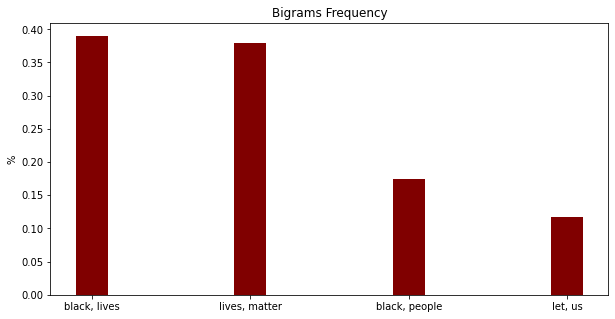

In [ ]:
import matplotlib.pyplot as plt
 
data = {'black, lives':0.39, 'lives, matter':0.3798, 'black, people':0.1741,
        'let, us':0.1171}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("")
plt.ylabel("%")
plt.title("Bigrams Frequency")
plt.show()

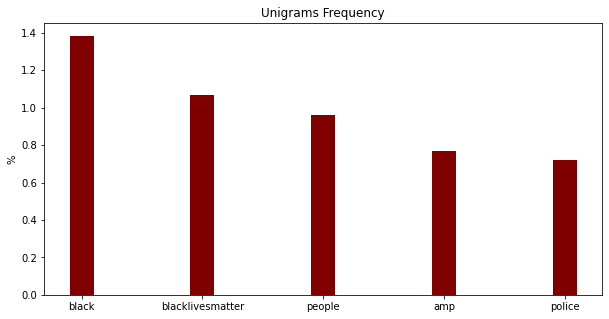

In [ ]:
data = {'black':               1.3832,
'blacklivesmatter':    1.0665,
'people':              0.9582,
'amp':                 0.7669,
'police':              0.7220}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("")
plt.ylabel("%")
plt.title("Unigrams Frequency")
plt.show()

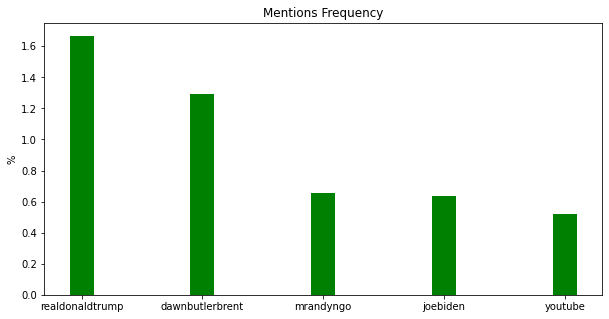

In [ ]:
data = {'realdonaldtrump':    0.016663*100,
'dawnbutlerbrent':    0.012922*100,
'mrandyngo':          0.006574*100,
'joebiden':           0.006348*100,
'youtube':            0.005214*100}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='green',
        width = 0.2)
 
plt.xlabel("")
plt.ylabel("%")
plt.title("Mentions Frequency")
plt.show()

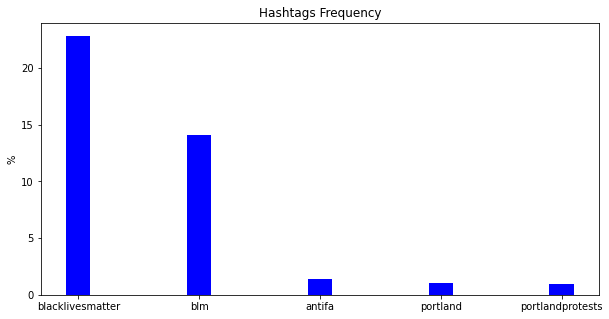

In [ ]:
data = {'blacklivesmatter':    0.228274*100,
'blm':                 0.141146*100,
'antifa':             0.014360*100,
'portland':            0.009970*100,
'portlandprotests':    0.009301*100}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, color ='blue',
        width = 0.2)
 
plt.xlabel("")
plt.ylabel("%")
plt.title("Hashtags Frequency")
plt.show()

([<matplotlib.patches.Wedge at 0x7f1c851a4640>,
 [Text(-0.5409884283210689, 0.9577742533722129, 'non-hate'),
  Text(0.5409885179943636, -0.9577742027212166, 'hate')])

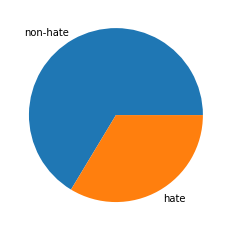

In [ ]:
labels = 'non-hate','hate'
sizes = [0.663, 0.336]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

# BERT Model


1.   Convert to BERT Tokenized Embeddings
2.   Dataset class with 80:10:10 train/test/val split
3.   BertClassifier for Non-hate/Hate classification
4.   Training loop with Adam optimizer, cross-entropy loss
5.   Evaluate model on test data




In [1]:
# from google.colab import drive
# drive.mount('drive')

import pandas as pd
df=pd.read_csv('/content/drive/My Drive/IW_COLAB/df.csv')
updated_df=pd.read_csv('/content/drive/My Drive/IW_COLAB/updated_df.csv')
updated_df_light=pd.read_csv('/content/drive/My Drive/IW_COLAB/updated_df_light.csv')

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.4 MB/s eta 0:00:00


In [3]:
df_bert = updated_df
df_bert_raw = df #raw tweets
df_bert_light = updated_df_light #light preprocessing (remove RT, #, @ ONLY)
                                
from nltk.tokenize.treebank import TreebankWordDetokenizer
#detokenize original word tokens for BertTokenizer lol
df_bert['hate label'] = df_bert['hate label'].astype(str)
for index, row in df['text'].iteritems():
  df_bert.at[index, 'text'] = TreebankWordDetokenizer().detokenize(row)
  if df_bert.at[index, 'hate label'] == 0:
    df_bert.at[index, 'hate label'] = 'non-hate'
  else: 
    df_bert.at[index, 'hate label'] = 'hate'


In [4]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'non-hate':0, 'hate':1}

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df_bert):

        self.labels = [labels[label] for label in df_bert['hate label']]
        #self.labels = [df_bert['hate label']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df_bert['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


In [5]:
# training/validation/test set => 80:10:10
np.random.seed(112)
df_train, df_val, df_test = np.split(df_bert.sample(frac=1, random_state=42), 
                                     [int(.8*len(df_bert)), int(.9*len(df_bert))])

print(len(df_train),len(df_val), len(df_test))

7332 916 917


In [6]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [8]:
from torch.optim import Adam
from tqdm import tqdm

#1 - processed tweet 2 - light processed 3 - raw
PATH = '/content/drive/My Drive/IW_COLAB/models/BLM_BERT_1.pth'
def save(model, optimizer, epoch):
    torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            }, PATH)

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda' if use_cuda else 'cpu')

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    try:
      checkpoint = torch.load(PATH)
      model.load_state_dict(checkpoint['model_state_dict'])
      optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
      epoch_num = checkpoint['epoch']
    except FileNotFoundError:
      print("No saved model checkpoint loaded, starting from scratch...")

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
            
            save(model, optimizer, epochs)
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


No saved model checkpoint loaded, starting from scratch...


100%|██████████| 3666/3666 [13:24<00:00,  4.56it/s]


Epochs: 1 | Train Loss:  0.017                 | Train Accuracy:  0.982                 | Val Loss:  0.000                 | Val Accuracy:  1.000


100%|██████████| 3666/3666 [13:23<00:00,  4.56it/s]


Epochs: 2 | Train Loss:  0.000                 | Train Accuracy:  1.000                 | Val Loss:  0.000                 | Val Accuracy:  1.000


100%|██████████| 3666/3666 [13:22<00:00,  4.57it/s]


Epochs: 3 | Train Loss:  0.000                 | Train Accuracy:  1.000                 | Val Loss:  0.000                 | Val Accuracy:  1.000


100%|██████████| 3666/3666 [13:22<00:00,  4.57it/s]


Epochs: 4 | Train Loss:  0.000                 | Train Accuracy:  1.000                 | Val Loss:  0.000                 | Val Accuracy:  1.000


100%|██████████| 3666/3666 [13:21<00:00,  4.57it/s]


Epochs: 5 | Train Loss:  0.000                 | Train Accuracy:  1.000                 | Val Loss:  0.000                 | Val Accuracy:  1.000


In [9]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

Test Accuracy:  1.000
